In [1]:
import numpy as np
import csv
import pandas
from math import isnan
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#reading dataset
df = pandas.read_csv('train_dig.csv')

In [8]:
#checking if we're missing data
df.isnull().sum().sum()
#we don't
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#deviding to data and prediction
df_x=df.drop(['label'],axis=1)
df_y=df['label']

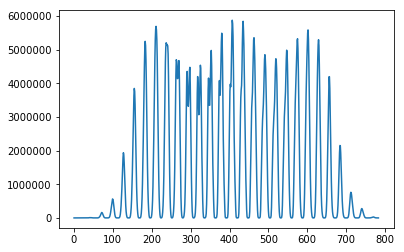

In [5]:
#plotting data - notice that we have ~ 100 pixels we can remove without damaging data
plt.plot(df_x.sum().as_matrix())

In [13]:
np.isinf(df).sum().sum()
df[df['label']==1]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Trying a PCA approach to dimensionality reduction without normalizing, emphisizing, etc.
n_comp = 3;
pca = PCA(152)
reduced_X=pca.fit_transform((df_x))

array([[ -6.61595780e+02,  -6.99311328e+02,   1.83282040e+02, ...,
         -1.05825293e+01,   2.43967728e+01,  -5.01843601e+01],
       [  1.70145168e+03,  -3.60551556e+02,  -5.01805594e+02, ...,
         -6.80431340e+00,  -2.85946759e+01,  -6.47221229e+01],
       [ -8.86894434e+02,  -2.93765782e+02,   6.71553099e+01, ...,
         -1.18857650e+01,   3.03442012e+01,  -3.48374975e+00],
       ..., 
       [  3.36269982e+02,   9.50015280e+02,  -1.68605414e+02, ...,
          4.34024245e+01,   6.71583430e+01,  -2.80896586e+01],
       [  3.27399392e+02,   6.20160895e+01,   6.97536401e+02, ...,
         -1.53977852e+00,  -2.74426729e+01,  -4.54504191e+01],
       [ -3.64249200e+02,   4.18893026e+02,   6.28998232e+01, ...,
          5.81158910e+01,  -2.27175977e+01,   3.84953199e+00]])

In [173]:
A=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#np.where((A>95) == True)

In [203]:
#Trying to use a simple SVC to solve the problem after pca reduction to 152 dim
OVC=OneVsRestClassifier(LinearSVC(random_state=0)).fit(df_x, df_y)
scores=cross_val_score(OVC,df_x,df_y,cv=2)
OVC.score(df_x,df_y)
#scored approximately 85%

0.87516666666666665

In [ ]:
#KNN
#Trying a PCA approach to dimensionality reduction without normalizing, emphisizing, etc.
n_comp = 20;
pca = PCA(20)
reduced_X_kNN=pca.fit_transform((df_x))

In [58]:
#Trying the K-NN approach. first we would like to sample 500 f.e. digit, train on it, and try to predict the rest
digits_list = [df[df['label']==i] for i in range(10)]
x_dig_train = []
#y_dig_train = []
for dig in digits_list:
    dig_train = dig.sample(500)
    x_dig_train.append(dig_train.drop(['label'],axis=1).index.values.astype(int))
#y_dig_train.append(dig_train['label'].index.values.astype(int))
#n_comp = 20;
#pca = PCA(n_comp)
#reduced_X_kNN=pca.fit_transform((df_x))

In [59]:
x_dig_train  = np.array(x_dig_train)

In [60]:
x_dig_train.flatten()

array([ 5938, 11303, 19395, ..., 36693,  6581, 41697])

In [208]:
nei_num = 3;
KC = KNeighborsClassifier(nei_num,weights='uniform')
KC.fit(df_x,df_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
#KC.score(df_x,df_y)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\matplotlib\collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  app.launch_new_instance()


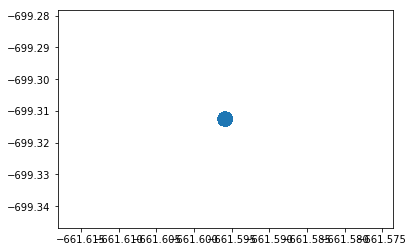

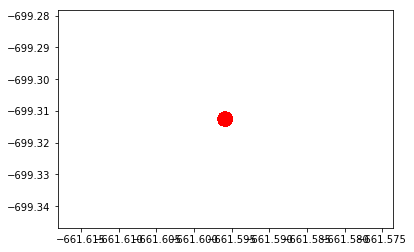

In [145]:
plt.scatter(reducted_X[df_y==1][:,0],reducted_X[df_y==1][:,1],reducted_X[df_y==1][:,2])
plt.figure()
plt.scatter(reducted_X[df_y==8][:,0],reducted_X[df_y==8][:,1],reducted_X[df_y==8][:,2],color = 'red')

In [39]:
reducted_X[df_y==1][:,1]

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([-360.55054253, -699.31038223, -360.55054253, ..., -699.31038223,
       -699.31038223, -699.31038223])

In [43]:
reducted_X[:,0]

array([ -661.59533926,  1701.45184727,  -886.89426301, ...,   336.26993215,
         327.39892052,  -364.24914987])

In [44]:
reducted_X

array([[ -661.59533926,  -699.31038223],
       [ 1701.45184727,  -360.55054253],
       [ -886.89426301,  -293.76547143],
       ..., 
       [  336.26993215,   950.01822144],
       [  327.39892052,    62.01473715],
       [ -364.24914987,   418.89162625]])

In [76]:
df_x.isfinite()

AttributeError: 'DataFrame' object has no attribute 'isfinite'

In [87]:
df_y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [90]:
df_x['pixel2'].value_counts()

0    42000
Name: pixel2, dtype: int64

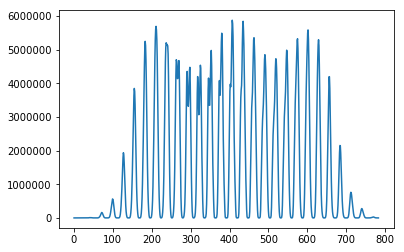

In [16]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [35]:
XX=df.sample(1)

In [42]:
XX.index.values.astype(int)

array([2095])